In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

data = pd.read_csv("ex2data1.txt", names=['exam1', 'exam2', 'result'])
data.describe()

,exam1,exam2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


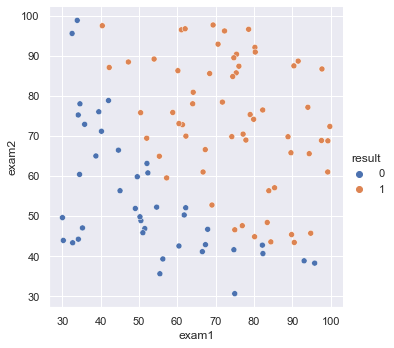

In [7]:
# plot the data
sns.set_theme()
sns.relplot(data=data, x="exam1", y="exam2", hue="result")

In [2]:
X1 = data.exam1
X2 = data.exam2
# normalize
X1 = (X1 - X1.mean()) / (X1.max() - X1.min())
X2 = (X2 - X2.mean()) / (X2.max() - X2.min())
Y = data.result
X = np.ndarray((len(X1), 3), dtype=np.float64)
X[:, 0] = 1.0
X[:, 1] = X1
X[:, 2] = X2
X

array([[ 1.        , -0.44461865,  0.17289229],
       [ 1.        , -0.50678017, -0.32705804],
       [ 1.        , -0.42707865,  0.0978552 ],
       [ 1.        , -0.07828222,  0.29423876],
       [ 1.        ,  0.19189691,  0.13362956],
       [ 1.        , -0.29470089, -0.145103  ],
       [ 1.        , -0.06503758,  0.443696  ],
       [ 1.        ,  0.13445035, -0.28810733],
       [ 1.        ,  0.14984459,  0.3105282 ],
       [ 1.        ,  0.26929634, -0.33235501],
       [ 1.        ,  0.43310447, -0.41011117],
       [ 1.        ,  0.13429144, -0.52176259],
       [ 1.        ,  0.23882772,  0.15029355],
       [ 1.        ,  0.05332329,  0.46138069],
       [ 1.        , -0.37417652,  0.14377271],
       [ 1.        , -0.16731236,  0.33670193],
       [ 1.        ,  0.04910302, -0.19748476],
       [ 1.        ,  0.03300291, -0.2862827 ],
       [ 1.        ,  0.07191207,  0.3911914 ],
       [ 1.        ,  0.16245759, -0.27313725],
       [ 1.        ,  0.0247639 , -0.342

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(theta):
    ux = X @ theta
    predict = sigmoid(ux)
    total_cost = -Y * np.log(predict) - (1 - Y) * np.log(1 - predict)
    return np.sum(total_cost) / len(Y)


def gradient(theta):
    ux = X @ theta
    predict = sigmoid(ux)
    predict_delta = predict - Y
    size = len(Y)
    d0 = np.sum(predict_delta) / size
    d1 = np.sum(predict_delta * X1) / size
    d2 = np.sum(predict_delta * X2) / size
    return np.array([d0, d1, d2])

test_z = np.array([0, -1, -2, -3, 1, 2, 3])
test_sigmoid = sigmoid(test_z)
print(test_sigmoid)

theta = np.array([1.0, 1.0, 1.0])
ux = X @ theta
predict = sigmoid(ux)
print(cost_function(theta))
print(gradient(theta))

[0.5        0.26894142 0.11920292 0.04742587 0.73105858 0.88079708
 0.95257413]
0.5816479293131718
[ 0.12464854 -0.06324455 -0.05407545]


[ 1.249878   10.44466312  9.84883334]


<AxesSubplot:>

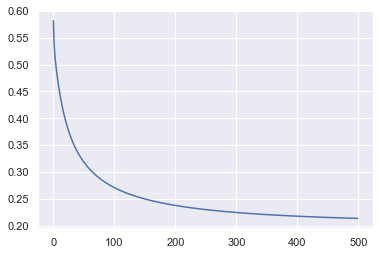

In [30]:
# logistic regression
theta = np.array([1.0, 1.0, 1.0])
numOfIteration = 0
alpha = 2.0
costs = []

for i in range(500):
    cost = cost_function(theta)
    g = gradient(theta)
    theta = theta - alpha * g
    costs.append(cost)

print(theta)
# plot costs
sns.lineplot(data=costs)

In [5]:
theta = np.array([1.249878, 10.44466312, 9.84883334])
Y_hat = sigmoid(X @ theta)
data["predict"] = Y_hat
data["predict"] = data["predict"] >= 0.5
data["predict"] = data["predict"].astype(int)
data["x1"] = X[:, 1]
data["x2"] = X[:, 2]
data.head()

,exam1,exam2,result,predict,x1,x2
0,34.623660,78.024693,0,0,-0.444619,0.172892
1,30.286711,43.894998,0,0,-0.506780,-0.327058
2,35.847409,72.902198,0,0,-0.427079,0.097855
3,60.182599,86.308552,1,1,-0.078282,0.294239
4,79.032736,75.344376,1,1,0.191897,0.133630


<AxesSubplot:xlabel='x1', ylabel='x2'>

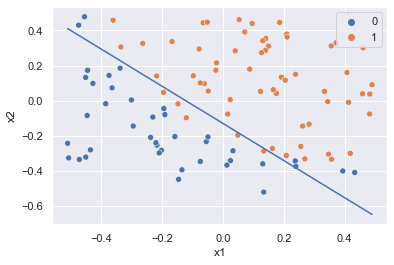

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=1)
sns.scatterplot(data=data, x="x1", y="x2", hue="result", ax=axs)
y = -1.06*data.x1 - 0.13
sns.lineplot(x=data.x1, y=y, ax=axs)

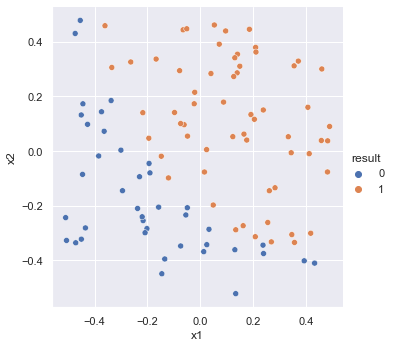

In [14]:
sns.relplot(data=data, x="x1", y="x2", hue="result")

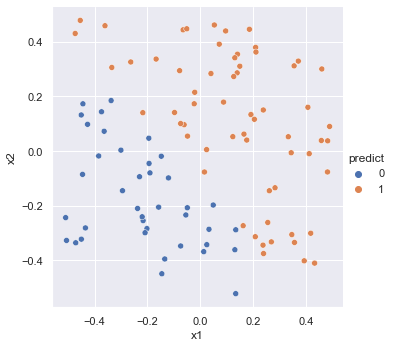

In [9]:
sns.relplot(data=data, x="x1", y="x2", hue="predict")